Viraj Dhillon 862015754

I am using the dataset that I scrapped from basketballreference.com, on NBA players. Let's see what the dataset looks like.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
statsDF = pd.read_csv("NBA1950-2019.csv")
statsDF.head()

,Unnamed: 0,Unnamed: 0.1,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,0,0,Zaid Abdul-Aziz,C,28.0,HOU,65.0,NaN,22.3,3.6,...,2.4,5.1,7.5,1.3,0.6,1.1,NaN,2.0,9.7,1975
1,1,1,Kareem Abdul-Jabbar*,C,27.0,MIL,65.0,NaN,42.3,12.5,...,3.0,11.0,14.0,4.1,1.0,3.3,NaN,3.2,30.0,1975
2,2,2,Don Adams,SF,27.0,DET,51.0,NaN,27.0,2.5,...,1.2,3.5,4.8,1.5,1.4,0.4,NaN,3.5,5.9,1975
3,3,3,Rick Adelman,PG,28.0,TOT,58.0,NaN,18.5,2.1,...,0.4,1.2,1.6,1.9,1.2,0.1,NaN,1.7,5.5,1975
4,4,4,Rick Adelman,PG,28.0,CHI,12.0,NaN,28.3,3.6,...,0.5,1.7,2.2,2.9,1.3,0.1,NaN,2.6,9.5,1975


We can see that there's multiple columns in this dataset as there should be. Players have a lot of statistics such as points per game, rebounds per game, etc. Let's see which columns this dataset provides us.

In [2]:
statsDF.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

It looks like we have some extra columns that aren't going to help us, specifically the first two. We can clean up our data to get rid of these extra columns.

In [3]:
statsDF = statsDF.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])
statsDF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

Looks like our columns are good and can provide us with interesting stats. But before we do any more EDA, we should also look at the index's. There may be some empty index's given. 

In [4]:
print(statsDF.loc[100]) #this example index was found going through the actual CSV file and finding a blank space.

Player     NaN
Pos        NaN
Age        NaN
Tm         NaN
G          NaN
GS         NaN
MP         NaN
FG         NaN
FGA        NaN
FG%        NaN
3P         NaN
3PA        NaN
3P%        NaN
2P         NaN
2PA        NaN
2P%        NaN
eFG%       NaN
FT         NaN
FTA        NaN
FT%        NaN
ORB        NaN
DRB        NaN
TRB        NaN
AST        NaN
STL        NaN
BLK        NaN
TOV        NaN
PF         NaN
PTS        NaN
Season    1975
Name: 100, dtype: object


This is an example of having inaccurate data. If we wanted to, for example, compute the average age of NBA players, then this empty index may throw off our final value. Thus, let's perform data cleaning to get rid of any empty rows.

In [5]:
print(statsDF.describe) #original amount of rows shown. 

<bound method NDFrame.describe of                      Player Pos   Age   Tm     G    GS    MP    FG   FGA  \
0           Zaid Abdul-Aziz   C  28.0  HOU  65.0   NaN  22.3   3.6   8.3   
1      Kareem Abdul-Jabbar*   C  27.0  MIL  65.0   NaN  42.3  12.5  24.4   
2                 Don Adams  SF  27.0  DET  51.0   NaN  27.0   2.5   6.2   
3              Rick Adelman  PG  28.0  TOT  58.0   NaN  18.5   2.1   5.0   
4              Rick Adelman  PG  28.0  CHI  12.0   NaN  28.3   3.6   8.7   
...                     ...  ..   ...  ...   ...   ...   ...   ...   ...   
26773       Lorenzen Wright   C  22.0  LAC  69.0  38.0  30.0   3.5   7.9   
26774        Sharone Wright   C  25.0  TOR   7.0   0.0   6.3   1.0   2.0   
26775          George Zídek   C  24.0  TOT  12.0   0.0   5.3   0.6   2.4   
26776          George Zídek   C  24.0  DEN   6.0   0.0   7.0   0.7   2.5   
26777          George Zídek   C  24.0  SEA   6.0   0.0   3.7   0.5   2.3   

         FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TO

In [6]:
statsDF = statsDF.dropna(subset=['Player'])
print(statsDF.describe)


<bound method NDFrame.describe of                      Player Pos   Age   Tm     G    GS    MP    FG   FGA  \
0           Zaid Abdul-Aziz   C  28.0  HOU  65.0   NaN  22.3   3.6   8.3   
1      Kareem Abdul-Jabbar*   C  27.0  MIL  65.0   NaN  42.3  12.5  24.4   
2                 Don Adams  SF  27.0  DET  51.0   NaN  27.0   2.5   6.2   
3              Rick Adelman  PG  28.0  TOT  58.0   NaN  18.5   2.1   5.0   
4              Rick Adelman  PG  28.0  CHI  12.0   NaN  28.3   3.6   8.7   
...                     ...  ..   ...  ...   ...   ...   ...   ...   ...   
26773       Lorenzen Wright   C  22.0  LAC  69.0  38.0  30.0   3.5   7.9   
26774        Sharone Wright   C  25.0  TOR   7.0   0.0   6.3   1.0   2.0   
26775          George Zídek   C  24.0  TOT  12.0   0.0   5.3   0.6   2.4   
26776          George Zídek   C  24.0  DEN   6.0   0.0   7.0   0.7   2.5   
26777          George Zídek   C  24.0  SEA   6.0   0.0   3.7   0.5   2.3   

         FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TO

As we can see, we have taken out some empty rows. Let's update any NaN elements in columns to be 0. 

In [7]:
df = statsDF.fillna(0)
print(df.describe)

<bound method NDFrame.describe of                      Player Pos   Age   Tm     G    GS    MP    FG   FGA  \
0           Zaid Abdul-Aziz   C  28.0  HOU  65.0   0.0  22.3   3.6   8.3   
1      Kareem Abdul-Jabbar*   C  27.0  MIL  65.0   0.0  42.3  12.5  24.4   
2                 Don Adams  SF  27.0  DET  51.0   0.0  27.0   2.5   6.2   
3              Rick Adelman  PG  28.0  TOT  58.0   0.0  18.5   2.1   5.0   
4              Rick Adelman  PG  28.0  CHI  12.0   0.0  28.3   3.6   8.7   
...                     ...  ..   ...  ...   ...   ...   ...   ...   ...   
26773       Lorenzen Wright   C  22.0  LAC  69.0  38.0  30.0   3.5   7.9   
26774        Sharone Wright   C  25.0  TOR   7.0   0.0   6.3   1.0   2.0   
26775          George Zídek   C  24.0  TOT  12.0   0.0   5.3   0.6   2.4   
26776          George Zídek   C  24.0  DEN   6.0   0.0   7.0   0.7   2.5   
26777          George Zídek   C  24.0  SEA   6.0   0.0   3.7   0.5   2.3   

         FG%  ...  ORB   DRB   TRB  AST  STL  BLK  TO

Now it seems time that we can finally do some EDA. Lets start with a bar graph analyzing the age of players. 

SG       895
SF       783
PF       750
PG       702
C        701
F         64
G         54
G-F       15
F-C       11
SG-PG     10
F-G        9
C-PF       8
PF-SF      8
SF-PF      8
PG-SG      8
SG-SF      5
SF-SG      5
C-F        5
PF-C       4
Name: Pos, dtype: int64


Text(0.5, 1.0, 'Amount of Players vs Positions Played')

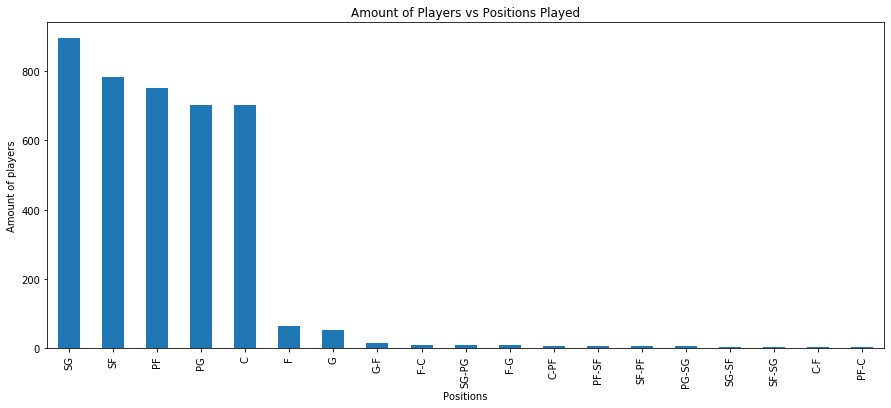

In [8]:
playerPositions = statsDF.drop_duplicates(subset = "Player") #removes duplicates, we don't want the same player to be counted again for a position. 
print(playerPositions["Pos"].value_counts())
playerPositions["Pos"].value_counts().plot.bar(figsize = (15,6))
plt.xlabel("Positions")
plt.ylabel("Amount of players")
plt.title("Amount of Players vs Positions Played")

In the graph, it seems that players who are strictly shooting guards are the most common position in the NBA. Since multiple players can play multiple positions, they are often labeled as multiple positions. An example is Brandon Ingram, who is a player that can play the SG, and SF. We cannot put players like BI strictly in a SG or SF column since they can be changed to play either position based on opponent team and head coach preference.

For the next graph, I'm going to use another dataset found on Kaggle. This dataset has information on NBA players individual attributes, such as height, years played, and colleges. Let's analyze in a histogram the weight of NBA players. No data cleaning is needed on this CSV because there are no missing columns/rows.

In [9]:
playerDF = pd.read_csv("player_data.csv")
playerDF.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Text(0, 0.5, 'Amount of players')

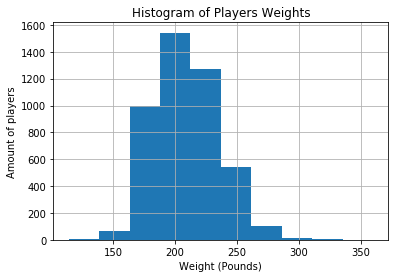

In [10]:
playerDF["weight"].hist(bins=10)
plt.title("Histogram of Players Weights")
plt.xlabel("Weight (Pounds)")
plt.ylabel("Amount of players")

This histogram shows the distribution of NBA players weights. Looking at the histogram, we can see that the most frequent weights range from around 175 pounds to 235 or so. 

Text(0, 0.5, 'Free Throw Percentage')

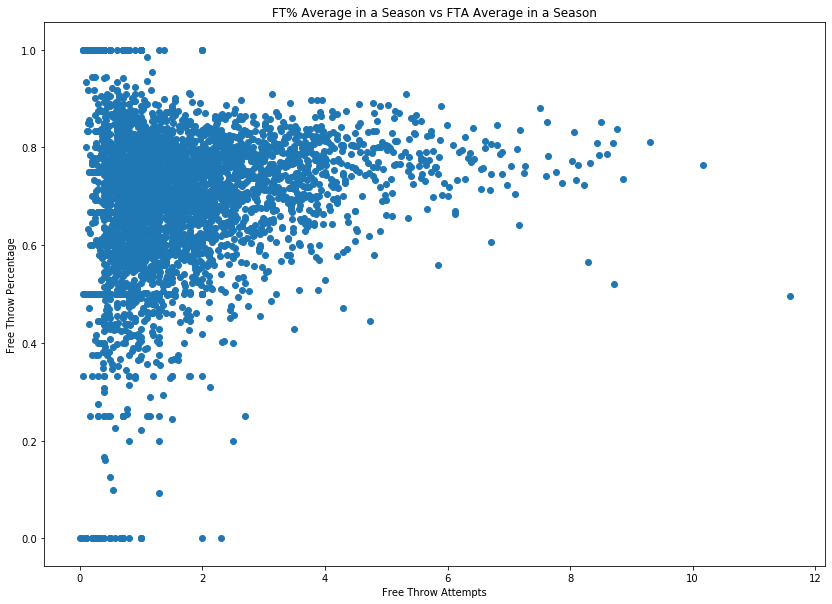

In [11]:
plt.figure(figsize = (14,10))
plt.scatter(statsDF.groupby(["Player"])["FTA"].mean(), statsDF.groupby(["Player"])["FT%"].mean())
plt.title("FT% Average in a Season vs FTA Average in a Season")
plt.xlabel("Free Throw Attempts")
plt.ylabel("Free Throw Percentage")

In this scatterplot, we can see the correlation between players free throw percentage and free throw attempts. In the graph, a majority of players will shoot from around 60% to 90%, with most players concentrated at around 80%. There is also a correlation to how many attempts and what their percentage is. Players who shoot poorly (30% and under) often have a lower amount of attempts. It looks that there is almost an exponential type of growth, as players who shoot well take more attempts. 

Text(0, 0.5, 'Points')

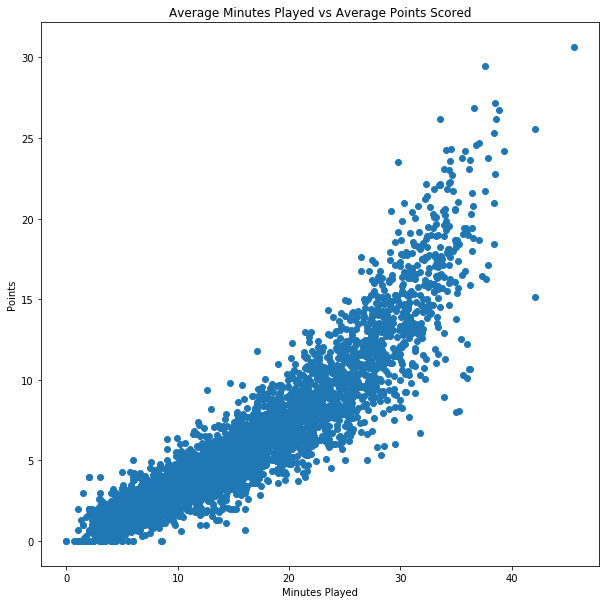

In [12]:
plt.figure(figsize = (10,10))
plt.scatter(statsDF.groupby(["Player"])["MP"].mean(), statsDF.groupby(["Player"])["PTS"].mean())
plt.title("Average Minutes Played vs Average Points Scored")
plt.xlabel("Minutes Played")
plt.ylabel("Points")

Here we can see a clear exponential growth in minutes played vs points scored. Players who have greater minutes played often score more points. 

  Pos      PTS      TRB      AST
0  PG  7.32953  5.35725  1.02432
1  SG  8.07742  5.02215  1.18309
2  SF  8.37351  2.18557  3.72775
3  PF  8.98556   3.6275  1.54467
4   C  9.13899  2.44317  2.07894


Text(0.5, 1.0, 'Position and Stat Averages')

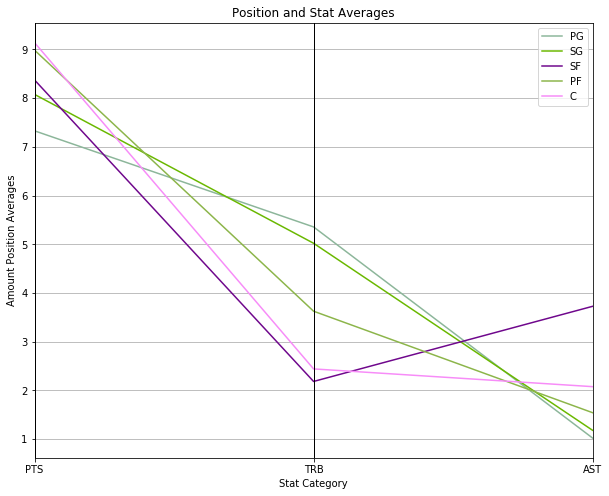

In [195]:
#from pandas.tools.plotting import parallel_coordinates
#posStats = statsDF.set_index(["Pos"])

posStats = (statsDF[statsDF["Pos"].isin(["PG", "SG", "SF", "PF", "C"])] )
posStats = posStats.groupby("Pos")

#print(statsDF.groupby("Player").set_index("Pos").loc["C"]["PTS"].mean())
posStats = pd.DataFrame([["PG", "SG", "SF", "PF", "C"],\
                         posStats["PTS"].mean(),posStats["TRB"].mean(),\
                         posStats["AST"].mean()])
posStats = posStats.T
posStats.columns = ["Pos", "PTS", "TRB", "AST"]
print(posStats)


plt.figure(figsize = (10,8))
pd.plotting.parallel_coordinates(posStats, class_column='Pos')
plt.xlabel("Stat Category")
plt.ylabel("Amount Position Averages")
plt.title("Position and Stat Averages")

This parallel coordinates graph shows the amount of points, rebounds, and assists that various positions in the NBA average. We are only concerned with the 5 definite positions, as having other ambiguous positions such as "PF-C" would create too many lines. The data is interesting because the expectations for each position were not what I expected. Centers average the most points, point guards average the most rebounds, and small forwards average the most assists. Normally it's seen that point guards are correlated with assists, small forwards with points, and centers with rebounds. 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

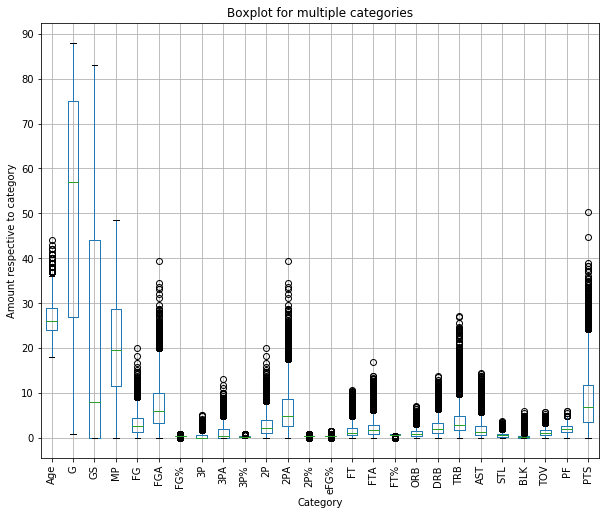

In [244]:
plt.figure(figsize = (10,8))
minusSeason = statsDF.drop(columns = ["Season"])
minusSeason.boxplot()
plt.title("Boxplot for multiple categories")
plt.xlabel("Category")
plt.ylabel("Amount respective to category")
plt.yticks(np.arange(0, 100, 10)) 
plt.xticks(rotation=90)

This boxplot shows multiple statistical values such as IQR, outliers, and the minimum and maximum. Some of these outliers, such as FG%, can be blamed to some NBA players only playing a few games and scoring high FG%. If an NBA player shoots 100% but only took one shot, that can mess with our data. But most of these statistical values remain consistent. For example, it seems normal that most NBA players average around 8 points because there are many players that score low numbers but contribute in other factors. 